<a href="https://colab.research.google.com/github/UmitOzteker/TensorFlow-Projects/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow İle Neural Network Classification

Veri analizinde kullanılan yöntemleri uygulayarak verileri sınıflandırma, bir dizi girdi verisi için sınıflandırma modelleri oluşturmak için kullanılan bir prosedürdür

Classification Tipleri:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Data Oluşturma

In [37]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
     noise=0.03,
     random_state=42)

Make Circles 2d boyutunda büyük bir dairenin içine küçük bir daire oluşturur

* **noise parametresi**: Bu parametre veri noktalarına eklenen rastgele hatanın şiddetini belirler. 0.03'lük bir değer, gürültünün neden olduğu maksimum yer değiştirmenin dairelerin yarıçaplarının %3'ü olacağı anlamına gelir. Basitçe ifade edersek, mükemmel dairelerin etrafında hafif bir bulanıklık oluşturur.

In [38]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [39]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [40]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


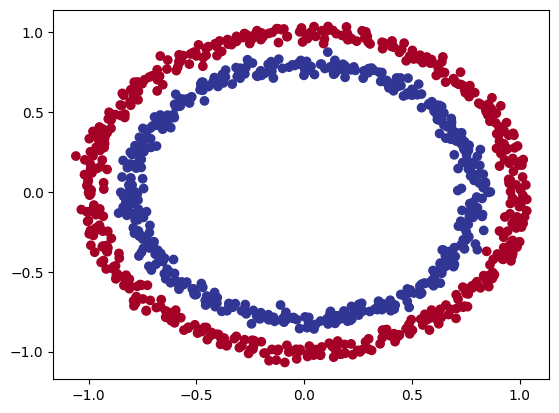

In [41]:
# plot ile Görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Input ve Output Şekilleri

In [42]:
 # Label ve feature'ların şekillerinin kontrolü
X.shape, y.shape

((1000, 2), (1000,))

In [43]:
len(X), len(y)

(1000, 1000)

In [44]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Modelleme Adımları

In [47]:
import tensorflow as tf
tf.random.set_seed(42)

# Model Oluşturma
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Modeli Fit Etme
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.2784 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 2.2206 - accuracy: 0.4983
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7369 - accuracy: 0.5015
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.4997
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4978


In [48]:
# Daha uzun eğiterek modeli geliştirme

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)
model.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5019
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4984
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4916
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4921
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4912
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5106
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4762
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4890
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4980
Epoch 11/

[0.6934650540351868, 0.5]

In [50]:
tf.random.set_seed(42)

# Model Oluşturma
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [51]:
# Modeli Evaluate etme
model_2.evaluate(X,y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932451725006104, 0.5]

In [52]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

#Modeli Geliştirme

In [54]:
tf.random.set_seed(42)

# Model Oluşturma
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_3.fit(tf.expand_dims(X, axis=-1),y , epochs=100, verbose=0)



In [55]:
# Modeli Evaluate etme
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939627528190613, 0.5]

In [57]:
model_3.predict(X)

32/32 [==============================] - 1s 5ms/step


array([[[0.5207089 ],
        [0.5203159 ]],

       [[0.5195733 ],
        [0.5202571 ]],

       [[0.51952875],
        [0.5202721 ]],

       ...,

       [[0.5200389 ],
        [0.51953274]],

       [[0.52064586],
        [0.5195647 ]],

       [[0.5203532 ],
        [0.5208665 ]]], dtype=float32)

Tahminleri görselleştirmek için fonksiyon oluşturma

In [78]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


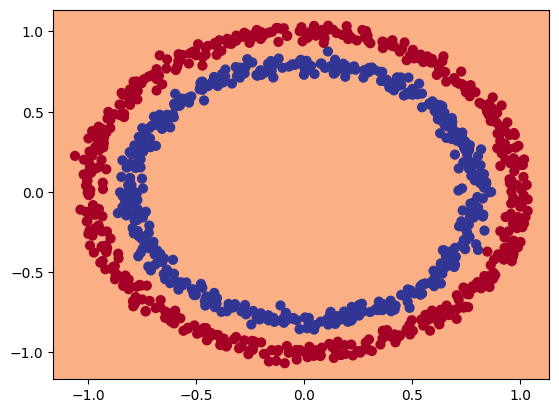

In [79]:
# Tahminleri Kontrol Etm
plot_decision_boundary(model_3, X, y)

In [82]:
tf.random.set_seed(42)

# Regression veri Oluşturma
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression, y_regression

# Veriyi eğitim ve test verisine bölme
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Modeli regression data ile fit etme
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: -5965.8643 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: -7144.9590 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -7152.6719 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7152.8076 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Model 3 binary classification problem için hazırlandığı için yukarıda çalışmadı


In [85]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 6ms/step - loss: 228.1861 - mae: 228.1861
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 119.9037 - mae: 119.9037
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 49.3278 - mae: 49.3278
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 74.1528 - mae: 74.1528
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 65.1696 - mae: 65.1696
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 44.5001 - mae: 44.5001
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 46.7751 - mae: 46.7751
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 41.7092 - mae: 41.7092
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 42.4685 - mae: 42.4685
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 41.8157 - mae: 41.8157
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 7ms/step


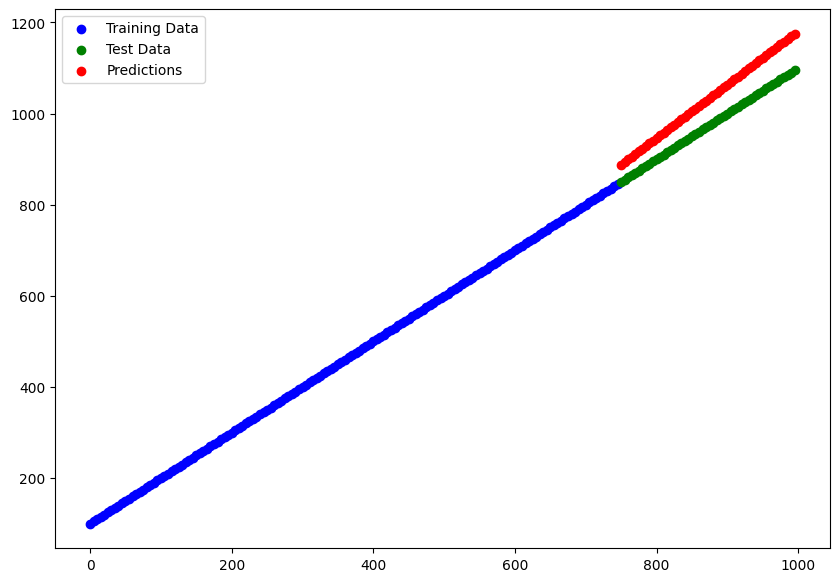

In [87]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();